In [82]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [83]:
import os
os.chdir("C:/Users/chenh/Desktop/y2s3/UCCC2513 Mini Project/Week 9")

In [84]:
img=cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray=cv.GaussianBlur(gray,(7,7),1.5)
rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8,
                         param1 = 150, param2 = 25)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img, center, 1, (0, 50, 50), 3)
        # circle outline
        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 255), 3)
        
cv.imshow("detected circles", img)
cv.waitKey(0)

-1

In [89]:
im=cv.imread('coins_1.jfif')
blur = cv.GaussianBlur(im, (3, 3), 0)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# parameters
params = cv.SimpleBlobDetector_Params()
params.filterByArea = False
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# Draw detected blobs as circles
blank = np.zeros((1,1))
im_with_keypoints = cv.drawKeypoints(im, keypoints, blank, (0, 0, 255),
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow("keypoints", im_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#Hough transform is easier to detect circle

# Question 2

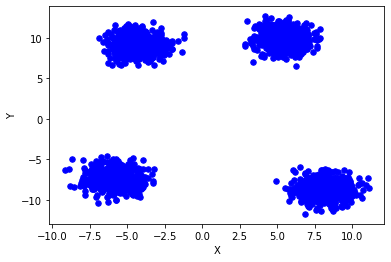

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# Create dataset with 4 random cluster centers and 2000 datapoints
x, y = make_blobs(n_samples = 2000, centers = 4, n_features=2, shuffle=True, random_state=31)
plt.scatter(x[:, 0], x[:, 1], s = 30, color ='b') 
  
# label the axes 
plt.xlabel('X') 
plt.ylabel('Y') 
  
plt.show()

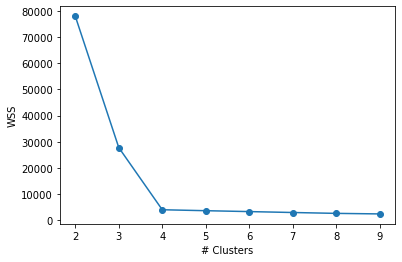

In [55]:
cluster_range = range(2,10)
cluster_wss = []
from sklearn.cluster import KMeans
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(x)
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [35]:
# 2 helper functions

def centroid_histogram(clust_labels):
    # Create histogram based on the number of pixels assigned to each cluster
    numLabels = len(np.unique(clust_labels))
    hist, _ = np.histogram(clust_labels, bins = numLabels)
    
    # Normalize the histogram, such that it sums to one
    hist = hist.astype("float32")
    hist /= hist.sum()
    
    return hist

def plot_colors(hist, centroids):
    # Initialize bar chart representing relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = np.uint8)
    startX = 0
    
    # loop over the percentage of each cluster and the color of each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent*300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
                    color.astype("uint8").tolist(), -1)
        startX = endX
        
    # return bar chart
    return bar

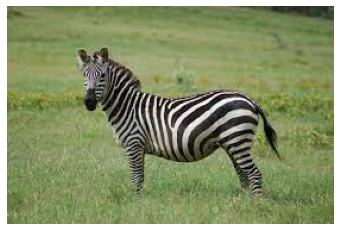

In [57]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(img_rgb)

# For k-means clustering, reshape the image to be a list of pixels
img_reshape = img_rgb.reshape((-1, 3))

# Convert uint8 to float
img_reshape = np.float32(img_reshape)

# define criteria, number of clusters and apply k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# convert the center back to uint8
center = np.uint8(center)

# 
res = center[label.flatten()]
result_image = res.reshape((img_rgb.shape))

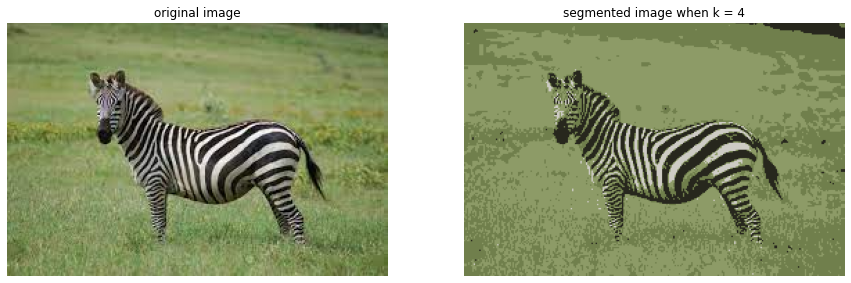

In [58]:
plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_rgb)
plt.title('original image'), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(result_image)
plt.title(f"segmented image when k = {K}"), plt.axis("off")
plt.show()

# Question 2 (subquestion)

In [59]:
# Convert the image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# reshape and convert to float32
img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 4

ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img = res.reshape(img_hsv.shape)

In [60]:
img_reshape_bgr = img.reshape((-1, 3))
img_reshape_bgr = np.float32(img_reshape_bgr)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
K = 4

ret, label, center = cv.kmeans(img_reshape_bgr, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img_bgr = res.reshape(img.shape)

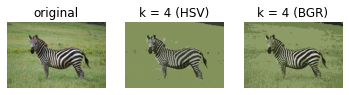

In [61]:
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.title(f'k = {K} (HSV)'), plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f'k = {K} (BGR)'), plt.axis("off")
plt.show()

In [86]:
#For K=4 (HSV) the background is totally blurred